## Library Imports

In [29]:
import math
from nltk.corpus import wordnet
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
import itertools

from sklearn.utils import shuffle



## **Import Dataset**

In [30]:
train = pd.read_csv("training.csv")
test = pd.read_csv("testing.csv")

## Seprate Train X and Train Y from training data

In [31]:
trainX = np.array(train['text'])
trainY = np.array(train['label'])
print(train.shape)
train.head()

(1300, 3)


,index,text,label
0,0,وسکانسن (ویب ڈیسک ) قارئین کے لیے یہ بات بہت...,1
1,1,\n\nریو ڈی جنیریو اب ماہرین نے ورزش کی ایک اور...,1
2,2,سعودی عرب نے پاکستان کو مزید مشکل میں ڈال دیا ...,1
3,3,آطف اسلم غصے میں کیا کر بیٹھے\nکراچی گلوکار عا...,1
4,4,\nگاڑی کی ٹکر سے ایک شخص کی ہلاکت پر بھارتی کر...,1


## Seprate Test X and Test Y from test data

In [32]:
testX = np.array(test['text'])
#testY = np.array(train['label'])

## Generate unigram Feature Matrix

In [33]:
vectTrain = CountVectorizer(input='content',decode_error='ignore',analyzer='word', strip_accents='unicode', binary=False, ngram_range=(1,2)).fit(trainX)
X_train_vectorized = vectTrain.transform(trainX).toarray()
X_test_vectorized = vectTrain.transform(testX).toarray()

## Plot Confussion matrix

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## GBM

In [35]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train_vectorized, trainY)

trainPredictiongbm = clf.predict(X_train_vectorized)
testPredictionsgbm = clf.predict(X_test_vectorized)
test['GBM_Result'] = testPredictionsgbm

## Training Confusion Matrix

[[750   1]
 [  0 549]]
Confusion matrix, without normalization


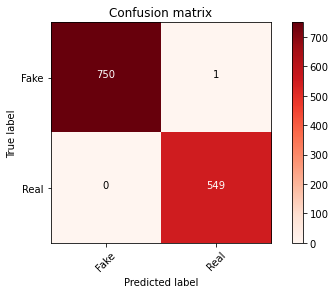

In [36]:
cm = confusion_matrix(trainPredictiongbm, trainY) 
print(cm)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Testing Confusion Matrix

In [37]:
# cm = confusion_matrix(testPredictionsgbm, testY) 
# print(cm)
# plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Training Accuracy

In [38]:
print ("Precision_Recall_Fscore on Training Data is:",precision_recall_fscore_support(trainY, trainPredictiongbm, average='weighted'))
print ("Overall Accuracy on Training Data is:",metrics.accuracy_score(trainY,trainPredictiongbm))

Precision_Recall_Fscore on Training Data is: (0.9992317935060944, 0.9992307692307693, 0.9992306755016966, None)
Overall Accuracy on Training Data is: 0.9992307692307693


## Testing Accuracy

In [39]:
# print ("Precision_Recall_Fscore on Testing Data is:",precision_recall_fscore_support(testY,testPredictionsgbm, average='weighted'))
# print ("Overall Accuracy on Testing Data is:",metrics.accuracy_score(testY,testPredictionsgbm))

In [40]:
test["Real/Fake"] = np.nan
for i in test.index:
  if test['GBM_Result'][i] == 1:
    test.loc[i, ['Real/Fake']] = 'F'
  elif test['GBM_Result'][i] == 0:
    test.loc[i, ['Real/Fake']] = 'R'

In [41]:
test

,Unnamed: 0,text,File_No,GBM_Result,Real/Fake
0,0,انٹرمٹنٹ فاسٹنگ: یہ ڈائٹ پلان کیا ہے اور انڈیا...,63,0,R
1,1,لیٹکس میں لکھنے لے لیے الفا ایک مفت ایڈیٹر \nل...,159,1,F
2,2,معروف کامیڈین عمر شریف کی صحت سے متعلق ان کے ب...,128,0,R
3,3,قوم سے ملی محبت کو لفظوں میں بیان نہیں کرسکتا،...,34,1,F
4,4,ریکارڈنگ کے دوران اداکارہ فضاء علی شاپنگ مال م...,13,0,R
...,...,...,...,...,...
295,295,واٹس ایپ وائس میسجز کے لیے دو نئے فیچرز متعارف...,101,0,R
296,296,اداکارہ صباءقمر اور گلوکار بلال سعید کے وارنٹ ...,152,0,R
297,297,مصر سے چار ٹانگوں والی وھیل کی نئی قسم دریافت\...,280,0,R
298,298,سام سنگ نے اپنے ڈیبٹ کارڈ کی تفصیلات بتا دیں\n...,118,1,F


## Save Prediction in file

In [28]:
final_result = pd.DataFrame()
final_result = test[["File_No", "Real/Fake"]]
final_result.to_csv('Lighting_GBM_Final_Result.csv', index=False, encoding="utf-8") 